# Random Forest

### Importing Libraries

In [1]:
#Importing Libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib import pyplot as plt 
print('Libraries Imported')

Libraries Imported


### Reading Dataset

In [2]:
df = pd.read_csv('sample.csv')

df.head()

,LN1,LN2,LN3,LN4,LN5,LN6,LN7,LN8,LN9,LN10,LN11,LN12,LN13,LN14,LN15,LN16
0,3.8067,0,1,0,0,9.2103,2.4849,0,0,0,1,1,1,2.8134,2.780608,2.5498
1,3.6109,0,1,0,0,9.2103,3.1781,0,0,0,1,1,0,2.8134,2.780608,2.5498
2,3.9120,0,1,0,1,7.7407,3.0910,0,0,0,1,0,0,3.3524,2.509745,2.0899
3,3.4965,0,1,0,1,7.5496,4.0943,0,0,0,1,0,1,3.3524,2.509745,2.0899
4,3.3673,0,1,0,1,7.6009,2.4849,0,0,1,1,0,1,3.3524,2.509745,2.0899


### Marking Features And Target Values

In [9]:
# Features
X = df.drop(columns=['LN13']).values
X1 = df.drop(columns=['LN13'])
# Target
y = df['LN13'].values
y1 = df['LN13']

### Training and Test Split

In [10]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Random Forest Regressor

### Training And Test Model

In [21]:
# Fitting Random Forest Regressor to the Training set
# Decision tree value set to 400 (Change n_estimators value)
classifier = RandomForestRegressor(n_estimators = 400, random_state = 0, oob_score=True)
clf = classifier.fit(X_train, y_train)
# Make predictions on test data
y_pred = classifier.predict(X_test)

### Accuracy And OOB Rate

In [22]:
# Performance metrics
errors = abs(y_pred - y_test)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')
print('OOB Rate' , classifier.oob_score_)

Average absolute error: 0.07 degrees.
Accuracy: 98.03 %.
OOB Rate 0.6720430940773046


# Random Forest Classifier

### Training And Testing Model

In [11]:
# Fitting Random Forest Classification to the Training set
# Decision tree value set to 400 (Change n_estimators value)
classifier = RandomForestClassifier(n_estimators = 400, random_state = 0, oob_score=True)
clf = classifier.fit(X_train, y_train)
# Make predictions on test data
y_pred = classifier.predict(X_test)

### Accuracy , OOB Rate And Confusion Matrix

Model accuracy score : 0.5000
OOB Rate 0.5


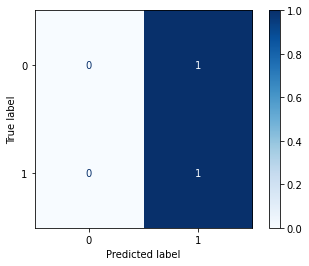

Confusion matrix
 [[0 1]
 [0 1]]


In [12]:
#print('Model accuracy score : {0:0.4f}'. format(clf.score(y_test, y_pred)))
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('OOB Rate' , classifier.oob_score_)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print('Confusion matrix\n', cm)

### Roc Rate And Curve For RF Classifier

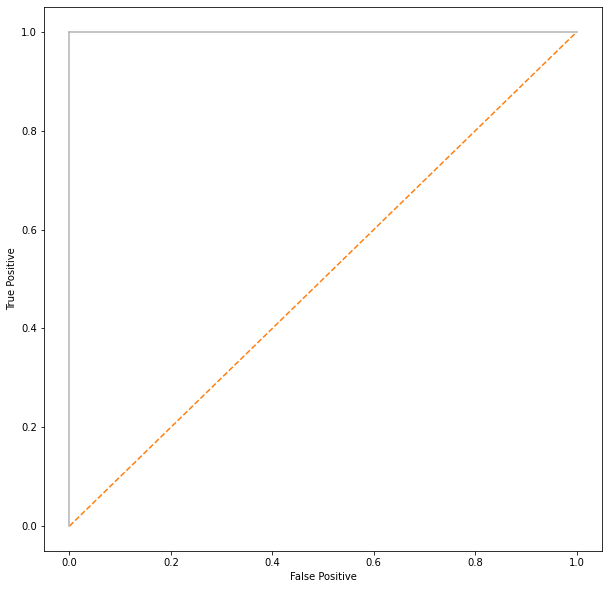

In [14]:
# print(y_test)
# print(y_pred)
m=X_test[:,[11]].flatten()
# print(m)

false_positive , true_positive, threshold = roc_curve(y_pred,y_test)

# print('roc_auc_score:',roc_auc_score(y_pred,y_test))

plt.subplots(1, figsize=(10,10))
plt.plot(false_positive,true_positive)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c=".7"),plt.plot([1,1],c=".7")
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.show()

# Feature Importance For Classifier And Regressor

   feature  importance
0      LN1    0.260167
6      LN7    0.175430
5      LN6    0.142182
3      LN4    0.131050
7      LN8    0.066579
14    LN16    0.055275
9     LN10    0.039047
11    LN12    0.036414
12    LN14    0.033318
4      LN5    0.032042
13    LN15    0.028496
1      LN2    0.000000
2      LN3    0.000000
8      LN9    0.000000
10    LN11    0.000000


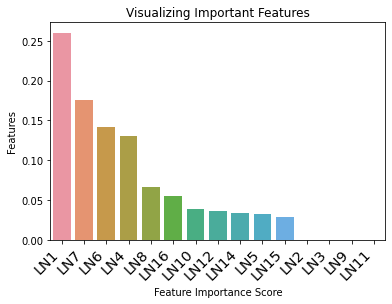

In [15]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(X1.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Display
print(feature_importances_df)
# visualize important featuers

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

# Decision Tree For Classifier And Regressor

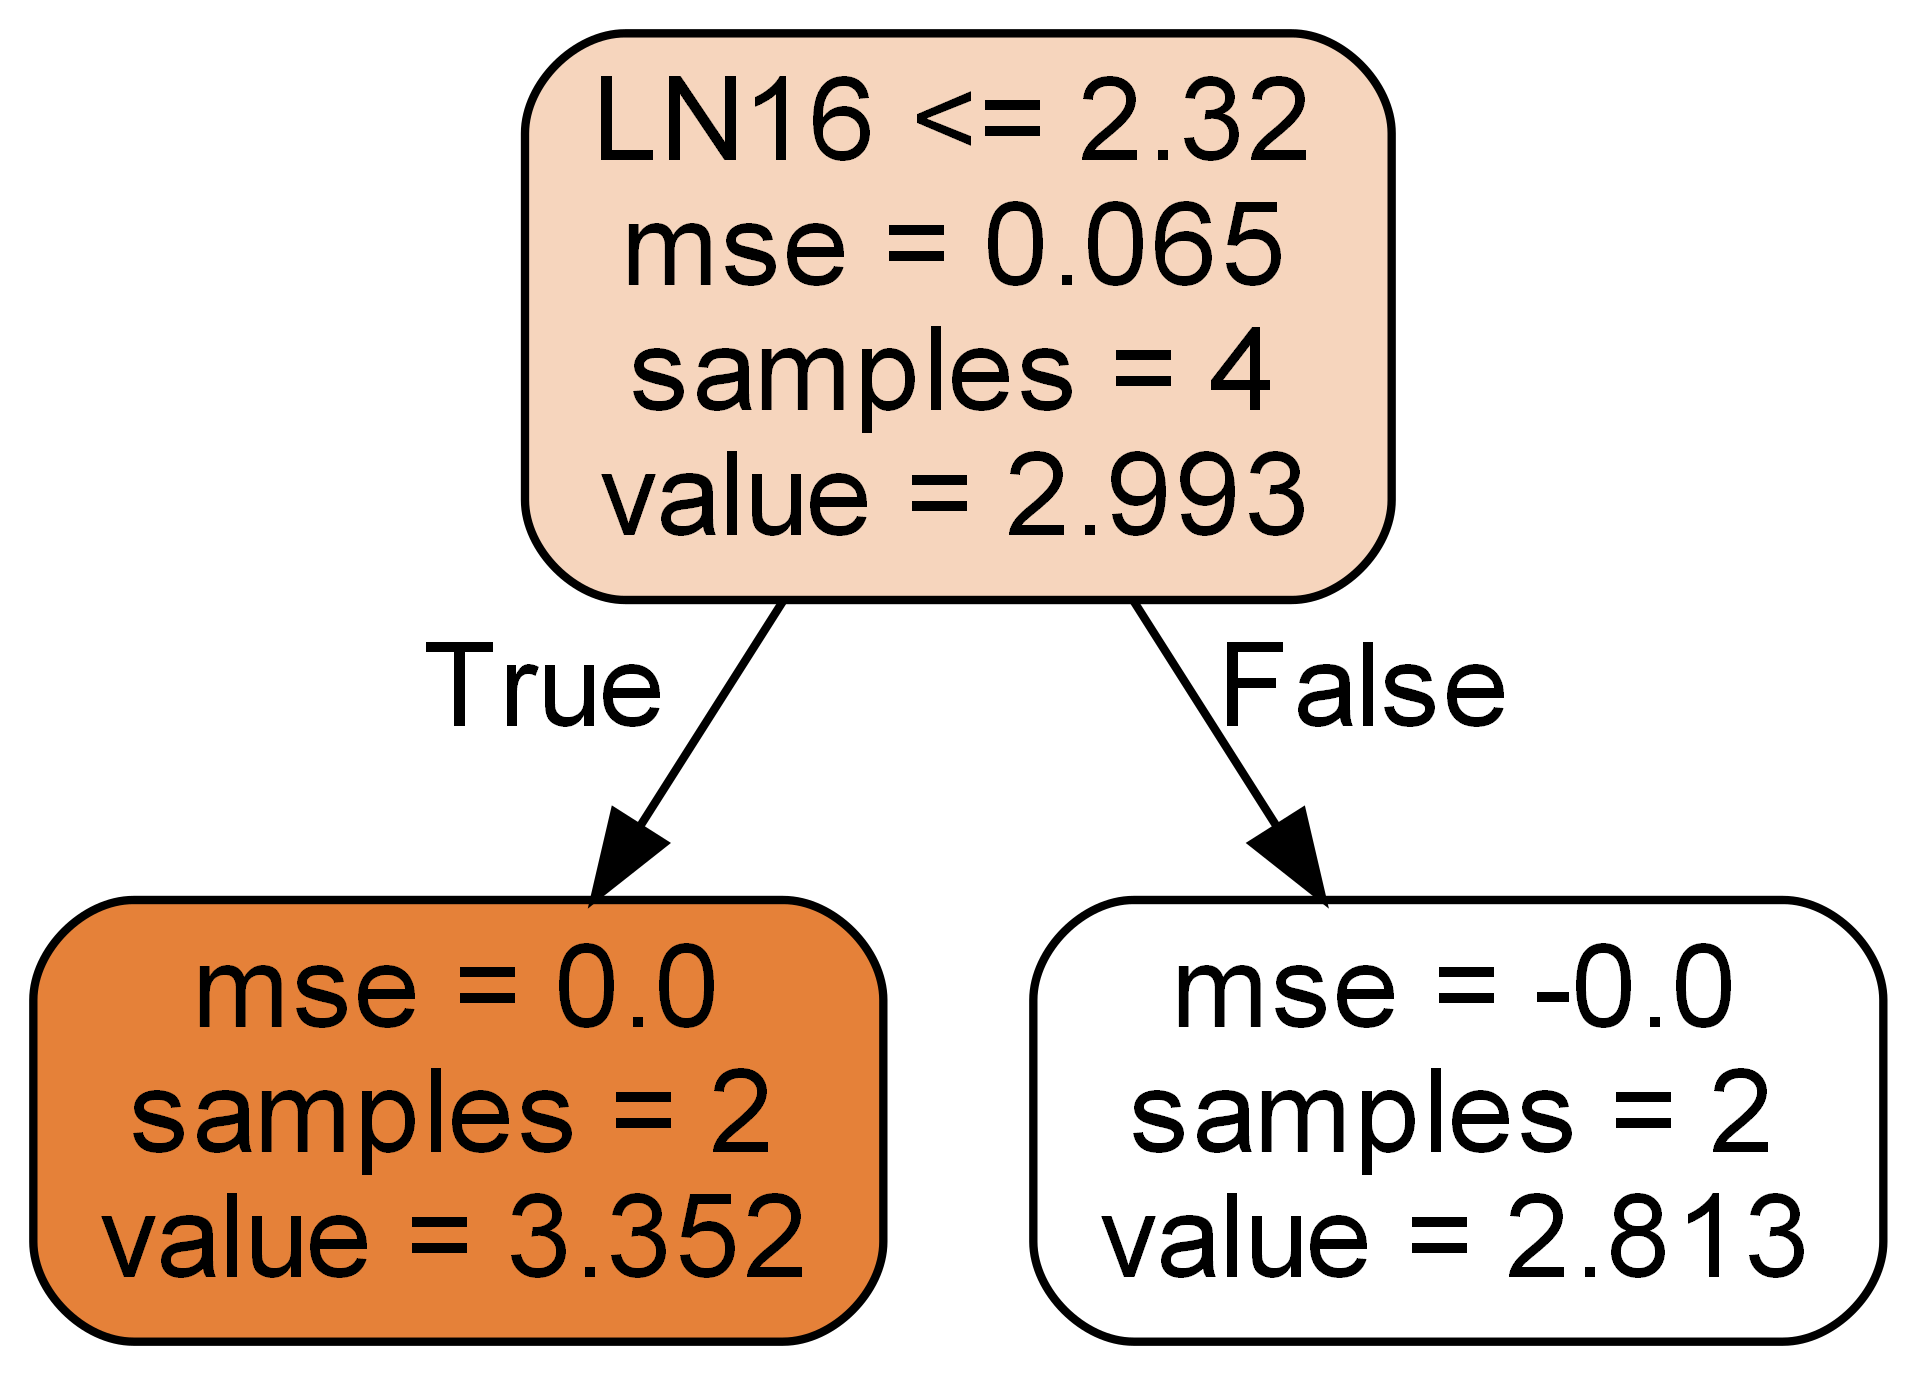

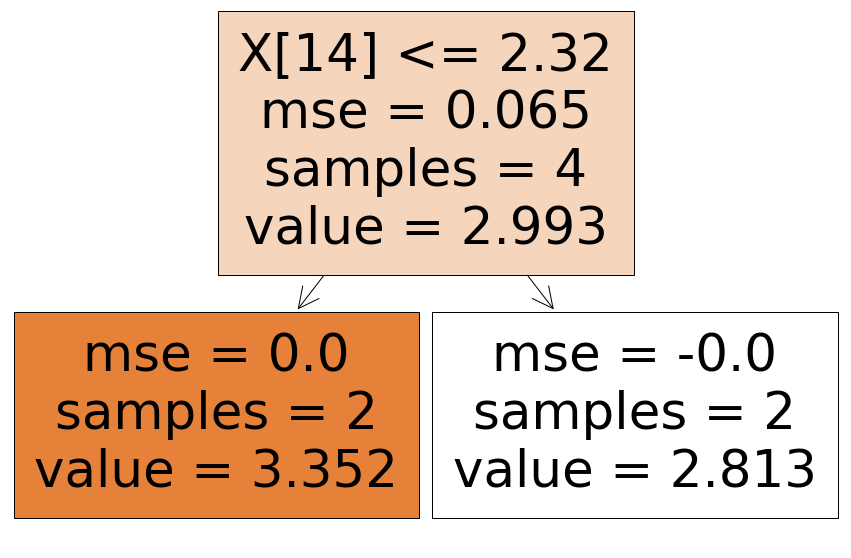

In [26]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(clf.estimators_[1],filled=True)

from sklearn.tree import export_graphviz
# Export as dot file

export_graphviz(clf.estimators_[1], 
                out_file='tree.dot', 
                feature_names = X1.columns,
                rounded = True,
                filled = True)
# Convert to png

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')